# **SEIQR Cellular Automata Report**

***

## **1 - Introduction**

##### **1.1 - Motivation**

A respiratory virus SARS-CoV2 initiated a worldwide pandemic as it is a highly transmissible and deadly infection which spreads via aerosol particles or fine droplets that contain the virus. It caused many deaths and huge concern regarding health, as well as staggering economic development through enforcing strict lockdowns in majority of the countries, where citizens have had to sit in isolation in order to contain the virus from spreading. As a result, it is vital to understand and monitor the development and spread of the virus.

We have used computational modelling to develop a SEIQR Cellular Automata model to help understand the spread of the virus within a population in detail. Using a cellular automata model allows us to visualise the spread of the virus throughout the population with time as well as model how the location of the virus start to spread in the population could impact spread. Other computational models, such as ODEs, can also achieve a similar outcome, however these are more focused on the frequency of individuals in a state, rather than their location. Also, a cellular automata model does not require knowledge of advanced mathematics, such as differential equations. As a result, a cellular automata model is more accessible for our audience. Our model considers many factors and parameters, such as population density, probabilities and time thresholds to model how changing different conditions can impact the spread of the virus throughout the population.



##### **1.2 - Entering the problem**

The problem is to create a model to map the spread of a virus (COVID-19) in a fixed environment and with a fixed sample size. Alterations to the model allow different conditions and scenarios to be mapped aiding in the visualisation of the behavior and movement of the virus.

***

## **2 - Methodology**
##### **2.1 - Packages**
To run the code a variety of packages are required as shown below:


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import random
import seiqr

The 'seiqr' package is a collection of Python functions which we have written specifically for this problem.

#### **2.2 - The initial population**
##### **2.2.1 - The lattice**
To create a fixed environment a 150 x 150 array is used, with each cell representing either an individual, a household or even towns and cities. To represent realistic conditions only 62.5% [1] of the cells are occupied. Unoccupied cells cannot be infected or spread infection.

This lattice size was chosen as it was a good compromise between running the code efficiently and having a sample size large enough to produce results which were reasonable and realistic. Results for smaller lattice sizes (such as 100 x 100) would often show unexpected trends, as any small fluctuations from the expected trend were exaggerated. Larger lattices (such as 400 x 400) had a significant impact on the processing speeds, as the larger square lattices meant that traversing through the arrays required much more processing and so were 3-4 times more time consuming. Although unsmooth fluctuation can be seen, it will not affect the overall trend of the spread.

##### **2.2.2 - The states of the cells**
Each occupied cell can be in one of five states (as it shows in Flowchart 1): Susceptible ($S$, represented by white), Exposed ($E$, represented by orange), Infected ($I$, represented by red), Quarantined ($Q$, represented by blue) or Recovered ($R$, represented by green) as presented below. In the model, these states are represented by integers 0 to 4. Unoccupied cells are represented by the integer 5 (represented by black). In the initial population for our model, there are $E_{i}$ cells in the exposed state and $I_{i}$ cells in the infected state. The remaining occupied cells start from a susceptible state.

##### **2.2.3 - Moore Neighbourhood**
In all simulations, the neighbourhood condition used follows the rules of the Moore neighbourhood, this means that any given cell $i$ will be surrounded by at most eight neighbours. These neighbours can influence the spread of the virus to the $i^{th}$ cell. An example of a Moore neighbourhood can be seen in the diagram below, where the yellow cells are the 'Moore neighbours' of the red cell.

![moore%20neighbourhood.png](attachment:moore%20neighbourhood.png)

The cells in the Moore neighbourhood of a given cell will influence the condition of the cell based off the following rules: if in contact with an infected cell it will then become exposed, there is then a finite probability which is increased if in contact with more infectious cells to show symptoms and become infected if the cell does not become infected it will return to susceptible, once infected there is a chance that this cell will then move to a quarantined state where it can no longer continue the spread. Once in quarantine there is a $T_R$ day period before the cell moves into recovered/ dead. If the cell does not move into quarantine then there is also a $T_R$ day period before that cell also moves into recovered. The rules are outlined in more detail in section 2.3.1

##### **2.2.4 - Random and clustered spreading**
The spreading in the initial population can be mapped in two main ways;  a 'random' spread where all cells have the same probability of becoming initially infected or a 'cluster' spread where only cells within a 30 x 30 grid have a probability of initially contracting the virus. The position of the 30x30 grid within the larger 150 x 150 lattice is randomised. This allows us to model for two real-life scenarios for the spread of the virus: one where there are infected and exposed people already spread throughout the population, and one where the spread begins from one specific region of the larger population, for example a neighbourhood or place of employment.

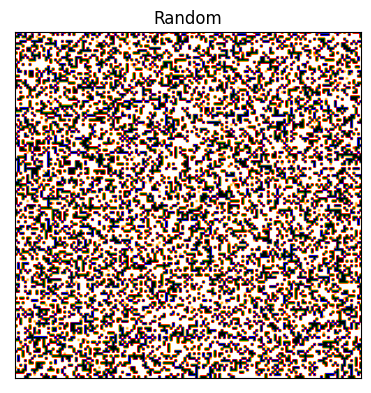

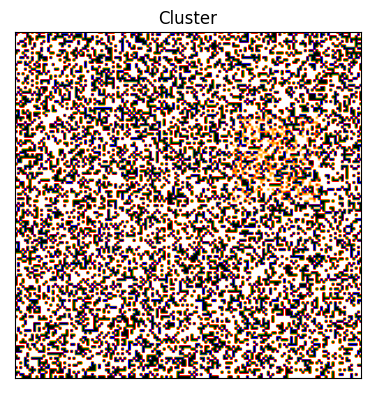

In [7]:
initial_random = seiqr.initial_pop(Ei=250,Ii=50,spread='random')
fig_1 = seiqr.plot_grid(initial_random,title='Random')
initial_cluster = seiqr.initial_pop(Ei=250,Ii=50,spread='cluster')
fig_2 = seiqr.plot_grid(initial_cluster,title = 'Cluster')

In the 'Cluster' diagram above, the yellow exposed cells and red infected cells are concentrated around one specific area, instead of being spread throughout the population. $E_i$ and $I_i$ values have been exaggerated for the purposes of these diagrams, to make the effect clearly visible. The actual model uses smaller, more reasonable values of $E_i$ and $I_i$ as outlined in section 2.3.2 below.

#### **2.3 - Running the simulation**

##### **2.3.1 - Simulation rules [1]**

**Getting exposed:**
A susceptible cell can become exposed with rate $P_{E}[N_{E(i)} + N_{I(i)}]$, where $P_{E}$ is the probability of getting exposed, $N_{E(i)}$ and $N_{I(i)}$ are the number of exposed and infected cells respectively, in the Moore neighbourhood of the $i^{th}$ susceptible cell. This describes the transition $S$ to $E$ in our model.

**Getting infected:**
With symptoms: an exposed cell can become infected with probability $P_{I}$. A threshold time of $T_{I}$ is also applied, to account for the incubation period for the virus. This describes the transition $E$ to $I$ in our model. If an exposed cell does not become infected, it returns to the susceptible state. This is the transition $E$ to $S$ in our model.

**Getting quarantined:**
An infected cell can move into quarantine after a threshold time of $T_{Q}$, with probability $P_{Q}$. This describes the transition from $I$ to $Q$ in our model.

**Recovery without quarantining:**
If an infected cell does not move into the quarantine state, they remain infected for $T_{R}$ days, after which they are recovered. This is the transition from $I$ to $R$ in our model.

**Recovery after quarantining:**
If an infected cell does move into quarantined state, it remains in that state for $T_{R}$ days, after which it becomes recovered. A quarantined cell cannot pass on the infection to any of its neighbours. This describes the transition $Q$ to $R$.

![finnnal.png](attachment:finnnal.png)

Flow Chart 1

##### **2.3.2 - Simulation Conditions**

All the simulations are run using the following conditions, unless mentioned otherwise (can be mentioned explicitly or in code):

**Default conditions:**

- Lattice size: $150$ x $150$
- Population density: $0.625^1$
- Number of days: $60$ - this time is chosen as it is how long it takes for the states to plateau and remain at a constant value
- Type of spreading: random

![finallll.png](attachment:finallll.png)

***

## **3 - Simulation & Results**

#### **3.1 - Types of spread**
##### **3.1.1 - Random spread**
The spread of a random array can be observed over the 60 day period below. It is observed that there is a quick spread of infected cell covering a majority of the environment and then followed by a large population of recovered. 

Initially there is a sharp increase in exposed cells which thus leads to a drastic increase in infected cells peaking at between 9,300 and 10,000 around day 15. Quarantined cells follows a similar pattern increasing to a peak, however peaking a few days later. Both exposed and infected decreased rapidly before plateauing, recovered, however, begun at zero and steadily begun inclining until plateauing at a high peak. This is displayed in Figure 1 below. The spread of the virus throughout the population for the first 40 days can also be seen below. Most of the single variable simulations later in the report will be comparing with these results, often being referred to as the control.

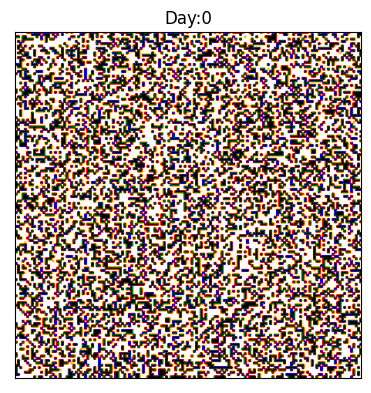

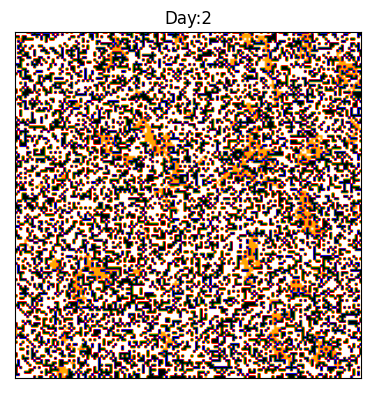

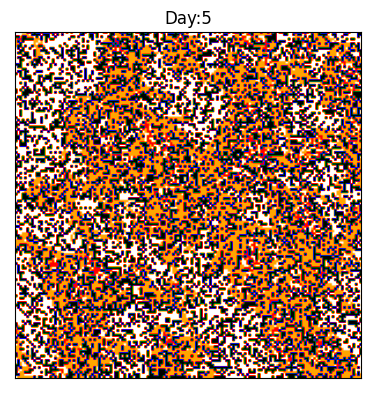

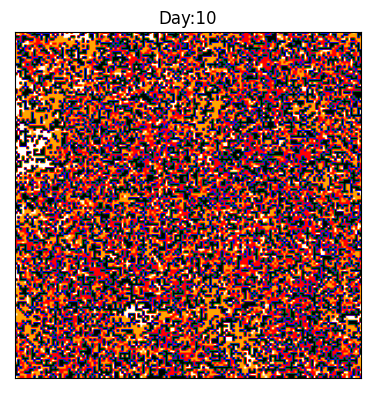

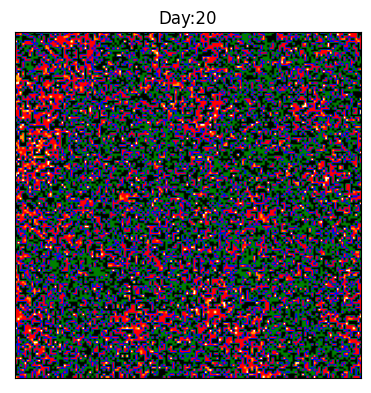

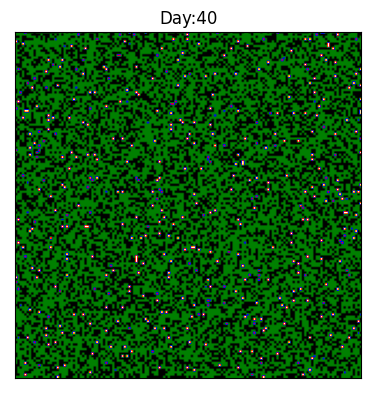

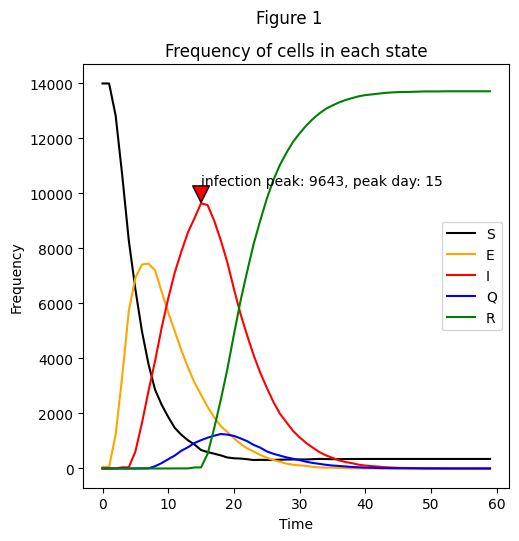

In [8]:
x_1 = seiqr.main(spread='random',showGrid=True,figtitle='Figure 1')

##### **3.1.2 - Clustered**
The spread of the clustered array can be observed below over 150 days. As it begins in a localized region, there is a slow spread to neighbouring regions which causes a wave of infected cells leaving behind recovered cells. This continues until the wave reaches the edges of the array.

In the clustered environment there is a more gradual incline in exposed cells followed again by a gradual incline in infected cells which peaked at ~3400 around day 18. There was then a very gradual decline which resulted in a higher plateau, this was the case with both infected and exposed. Quarantined cells also very gradually increased and decreased a lot lower than infected. Recovered gradually incline and plateaued. This is good for healthcare systems, as it means that there is less pressure on healthcare at any given time, as proportion of the population infected at the peak is significantly lower than with random spreading. This is displayed in Figure 2 below. The spread of the virus throughout the population can also be seen over the first 40 days below.

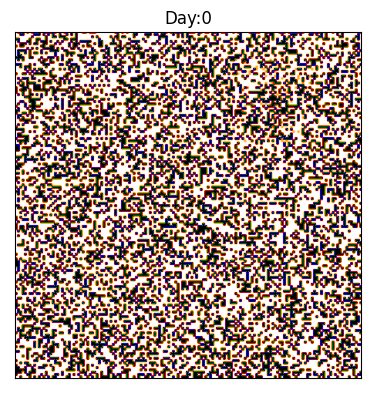

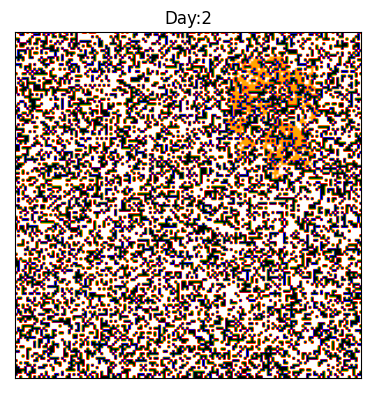

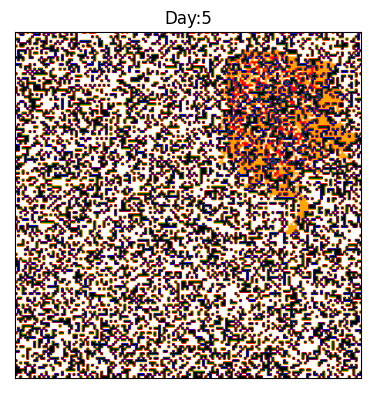

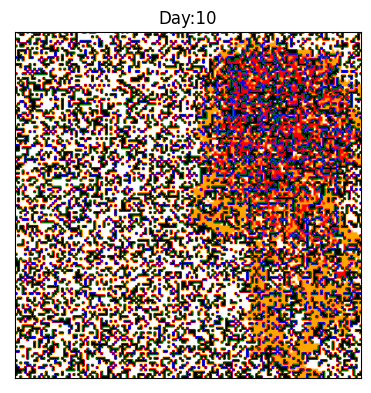

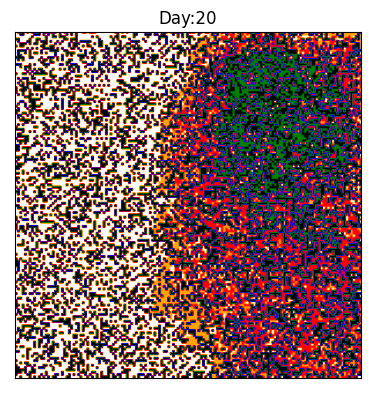

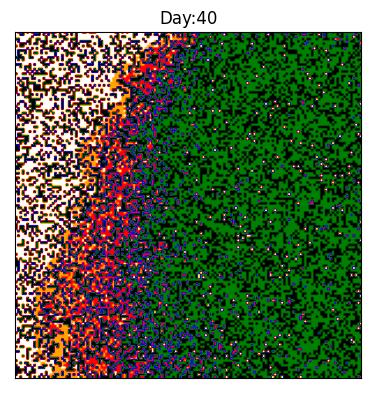

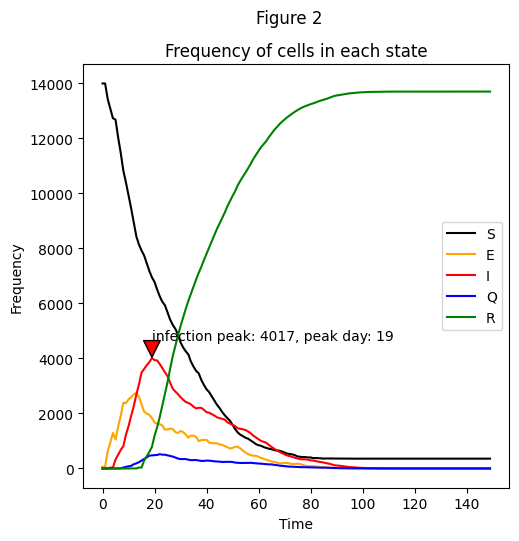

In [9]:
x_2 = seiqr.main(spread='cluster',showGrid=True,time=150,figtitle = 'Figure 2')

#### **3.2 - Altering the model**

##### **3.2.1 - Population density**
Population density can be adjusted by increasing and proportion the percentage of occupied cells in the lattice. Doing so allows a clear comparison of the spread of the virus in different areas, such as rural regions and cities or different countries as a whole. The values of 0.5 for the lower density and 0.7 for the high density were chosen as they produced clear graphs that observed a big difference to the default density of 0.65. The results of altering the density can be viewed below.

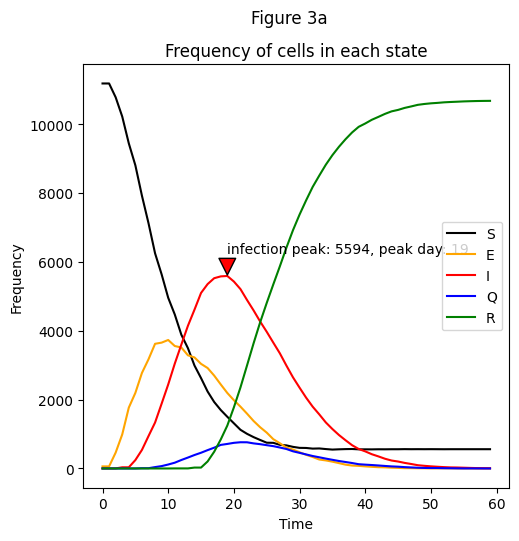

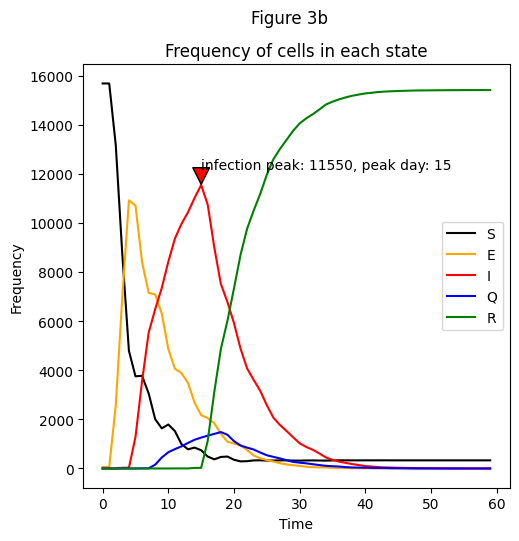

In [10]:
x_3 = seiqr.main(density= 0.5,figtitle = 'Figure 3a')
x_4 = seiqr.main(density= 0.7, figtitle = 'Figure 3b')

##### **3.2.2 - Increasing testing efficiency**
Increasing the quarantining parameter $P_{q}$ (probability of an infected cell going into quarantine) has an effect on the total infected and exposed cells in the sample. Higher efficiency allows higher portion to be infromed into quarantine.

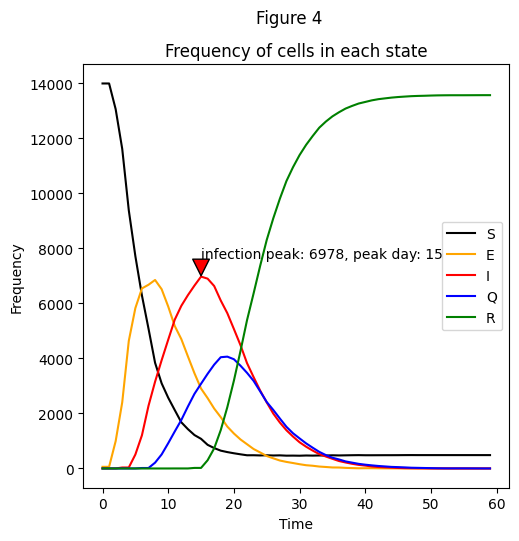

In [11]:
x_5 = seiqr.main(Pq=0.4,figtitle = 'Figure 4')

##### **3.2.3 - Improving healthcare**
To display an improved healthcare system, the time for recovery is decreased (from $T_R = 10$ days to $T_R = 8$days) $^2$.  

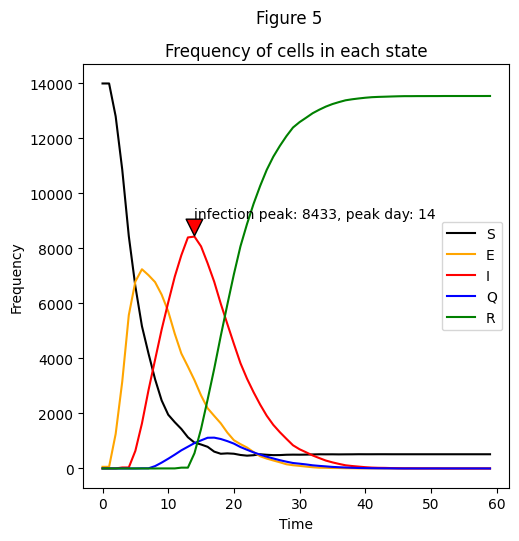

In [12]:
x_6 = seiqr.main(Tr=8,figtitle = 'Figure 5')

##### **3.2.4 - Altering initial infected population**
Altering the initial number of exposed ($E_{i}$) and infected ($I_{i}$) cells affects the spread of the virus quite significantly. In Figure 6b below (when $E_i = 130$ and $I_i = 6$), it is clear that when the initial number of exposed and infected cells is higher, the infection peak is higher. This peak happens around the same time in both scenarios. 

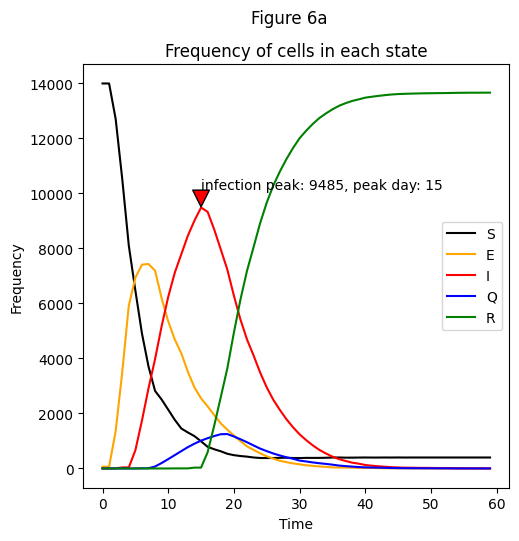

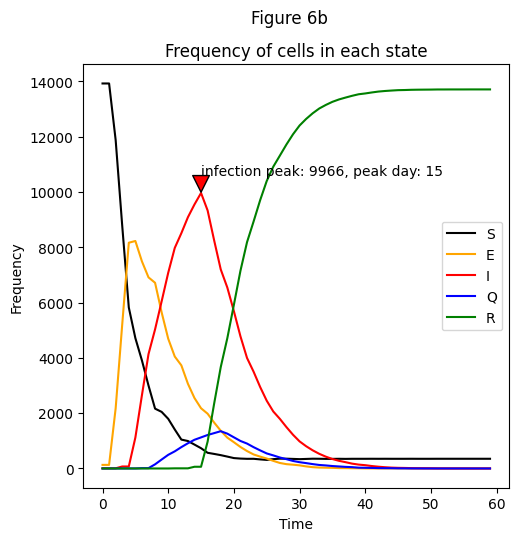

In [13]:
x_7 = seiqr.main(Ei=65,Ii=3,figtitle = 'Figure 6a')
x_8 = seiqr.main(Ei=130,Ii=6, figtitle = 'Figure 6b')

***

## **4 - Discussion**

##### **4.1 - Altering population density**
As the population density is decreased from 0.65 to 0.5, a decrease in infected cells is observed. This is not only due to the overall decrease in population but also due to the lack of neighbouring occupied cells (as the lattice has remained at 150x150). The day of the peak is also later. The opposite is observed with an increase in population density (0.7), with the infection peak being much greater than that of the control (0.65). This can be seen in figure 3a and 3b. Furthermore, the percentage of the population that became infected overall was considerable greater in the high population density than that of the control.

Therefore, as we increase population density we observe an incline in the peak of infected cells. This highlights how influential neighbouring cells are and that when trying to reduce the spread of the virus and percentage of infected cells, social distancing is extremely important.

##### **4.2 - Increasing testing efficiency**
Countries with harsher or more organised quarantining procedures can decrease the rate of infection, exposure and the total number infected and exposed people, containing the spread of the virus. Quarantining status would be obtained by an individual testing positive for a presence of the viral infection via a method of detecting the virus, therefore countries that have invested heavily into developing and using better testing methods and setting up more testing facilities are likely to have a better control of the spread, as they have higher proportion of the population going into quarantine. As more cells go into quarantine, less cells get exposed, hence less infections occur. Figure 4 with $P_q$ of 0.4 shows that there is a significantly lower infection peak than in Figure 1 (where $P_q = 0.12$)

 ##### **4.3 - Improved healthcare**

When the recovery time is decreased, the infection peak is observed to be lower and happens earlier. This is because the infected cells (not in quarantine) can infect other cells for a shorter period of time, and so spread of infection is less likely. This shows the importance of fast recovery in controlling the spread of the virus. However, a limitation in the model is that it assumes that everyone has the same recovery time. The nature of the virus means that individuals react and recover from the virus at different rates, based on many factors such as other underlying health conditions, age and obesity.

Figure 5 with $T_R = 8$ can be compared with $T_R = 10$ in Figure 1.

##### **4.4 - Altering initial infected population**

Compared to Figure 1, the number of exposed and infected cells are only altered by a small amount in Figure 6a, yet this has a large impact on cases, particularly around the peak. This would means that when the initial number of exposed and infected people is high, cases and hospitalisations are likely to be higher around the peak, putting further pressure on healthcare systems. This further highlights the importance of applying social distancing and lockdown measures at an early stage. Figure 6a and 6b show how the number of infections increases when initialy number of exposed and infected cells are doubled.

***

## **5- Limitations**
Our model has several limitations, some of which have already been mention in the report. 

One limitation in our model is that it does not consider death. The recovered state ($R$) considers recovery and removal. This means that an increase in cells in this state is not necessarily positive, as it could also mean there is an increase in deaths. To improve our model, we could add another state for cells in the dead state.

Another limitation of the model is that it assumes a fixed maximum day of recovery or removal $T_R$. We tried a range from 8 to 10 days. This number highly depends on region and variant. Research by Noel George et. al $^2$ has concluded a recovery time ranging from 5 to 36 days based on different states/unions in India. Only ranging from 8 to 10 is not representative of how individuals may recover from the disease.

A further limitation of our model is that a recovered cell cannot be reinfected$^3$. In reality, this is not the case as individuals can get the virus twice. This means that our model does not show a 'second wave', which most countries in the world have experienced.

Also, we apply the rules universally to each cell. However, different individuals are affected by the virus in different ways. For example, some may be more likely to become infected with symptoms after exposed (so they would have a higher $P_I$), while others may test more often and to would go into quarantine sooner (and so would have a lower $T_Q$ value) at the same time with individuals not having symptoms at all and may never receive a test$^4$.

To address the limitation, we may refer to real life population age and health structure too create new lattice with health status implanted. Add new parameters to simulate individual with different health state and apply different rules.

***

## **6- Conclusion**
It is very important that when a virus causes a global pandemic, countries implement different controls to help reduce the percentage of the population infected and thus deaths. As we've seen, different countries and cities with different population densities will be affected in their own way, highlighting the focus for increasing testing efficiency and improving healthcare in certain areas first. The importance of lockdowns and social distancing is also strongly pushed as the percentage of infected has a massive negative impact on the healthcare system.

The cellular automata model can give a lot of insight in predicting and preparing for different situations during the pandemic. However, it must be acknowledged that it is only a model, and so should be used alongside other tools such as real-life data and information about how other similar viruses spread, rather than in isolation.

***

## **References**
1. Ghosh, S. and Bhattacharya, S., 2021. Computational Model on COVID-19 Pandemic Using Probabilistic Cellular Automata. SN Computer Science, 2(3).

2. George, N., Tyagi, N. K., & Prasad, J. B. (2021). COVID-19 pandemic and its average recovery time in Indian states. In Clinical Epidemiology and Global Health (Vol. 11, p. 100740). Elsevier BV. 
https://doi.org/10.1016/j.cegh.2021.100740

3. YU Ping et. al. (2021): analysis of re-detectable positive test causes and infectivity in COVID-19 discharged patients  INFECTIOUS DISEASE INFORMATION (Volume 34 Issue 02)
Doi: 10.3969/j.issn.1007-8134.2021.02.021

4. Johansson, M. A., Quandelacy, T. M., Kada, S., Prasad, P. V., Steele, M., Brooks, J. T., Slayton, R. B., Biggerstaff, M., & Butler, J. C. (2021). SARS-CoV-2 Transmission From People Without COVID-19 Symptoms. In JAMA Network Open (Vol. 4, Issue 1, p. e2035057). American Medical Association. https://doi.org/10.1001/jamanetworkopen.2020.3505